<a href="https://colab.research.google.com/github/IlyaMolchanovv/MachineLearning/blob/main/indiv_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv("/content/car.csv")

df


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [17]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [18]:
df_encoded = pd.get_dummies(df)


df_encoded

,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,2_3,...,small_big,small_med,small_small,low_high,low_low,low_med,unacc_acc,unacc_good,unacc_unacc,unacc_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('unacc_good', axis=1)
y = df_encoded['unacc_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

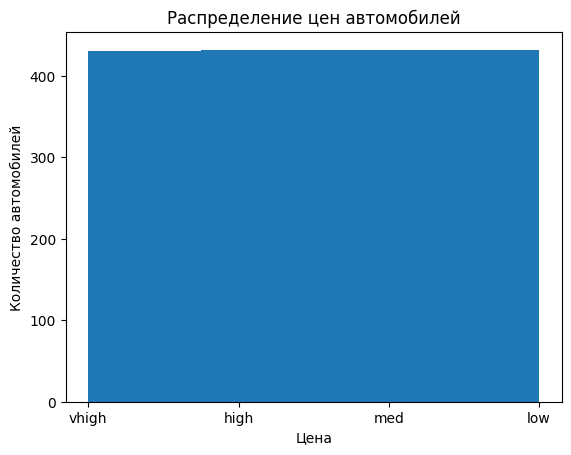

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["vhigh.1"], bins=4)
plt.xlabel("Цена")
plt.ylabel("Количество автомобилей")
plt.title("Распределение цен автомобилей")
plt.show()

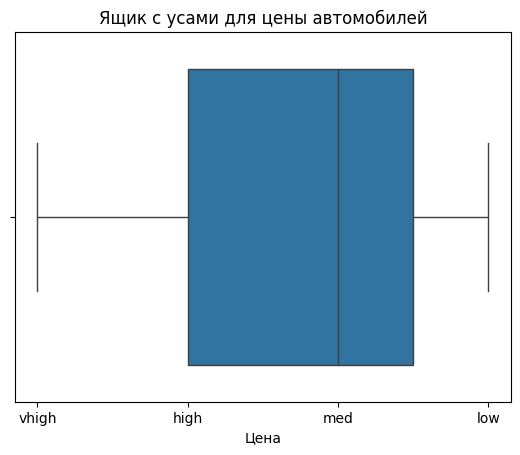

In [11]:
import seaborn as sns

sns.boxplot(x=df["vhigh.1"])
plt.xlabel("Цена")
plt.title("Ящик с усами для цены автомобилей")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.9855491329479769
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       331
           1       1.00      0.67      0.80        15

    accuracy                           0.99       346
   macro avg       0.99      0.83      0.90       346
weighted avg       0.99      0.99      0.98       346



In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Предсказание на тестовом наборе данных с улучшенной моделью
y_pred_best = best_rf_model.predict(X_test)

# Оценка производительности улучшенной модели
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

# Отчет о классификации для улучшенной модели
print(classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.9855491329479769
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       331
           1       1.00      0.67      0.80        15

    accuracy                           0.99       346
   macro avg       0.99      0.83      0.90       346
weighted avg       0.99      0.99      0.98       346

